In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd
import os
import numpy as np
import glob
import scipy

from mpl_toolkits.mplot3d import Axes3D
import ROOT


Welcome to JupyROOT 6.22/02


In [2]:
uni = "20230331_edcn_type5_cla3_l3_max_mean_logcosh_7"   #### X,Y,Z new best / CHEP result

path = "/users/yewzzang/work/JSNS2_vertex/result/*"+uni +"*/*"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

In [3]:
df = pd.read_csv(pred_list[0])

In [5]:
pred = np.array(df['prediction']).reshape(-1,4)
label = np.array(df['label']).reshape(-1,4)
jade = np.array(df['jade']).reshape(-1,4)


In [21]:
energy_list = [1,2,3,4,5,6,7,8,9,10]
# energy_list = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

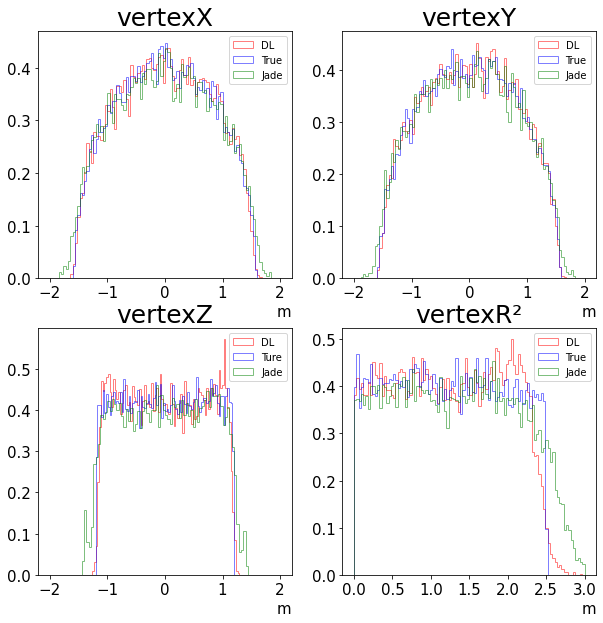

In [7]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.subplot(2,2,1)
plt.hist(pred[:,0], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(label[:,0], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')
plt.hist(jade[:,0], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')

plt.title('vertexX',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,2)
plt.hist(pred[:,1], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(label[:,1], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')
plt.hist(jade[:,1], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')

plt.title('vertexY',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()

plt.subplot(2,2,3)
plt.hist(pred[:,2], bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'Ture')
plt.hist(jade[:,2], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')
plt.title('vertexZ',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,4)
plt.hist((pred[:,0]**2+pred[:,1]** 2), bins = 100, range = [0,3], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist((label[:,0]**2+label[:,1]**2), bins = 100, range = [0,3], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')
plt.hist((jade[:,0]**2+jade[:,1]**2), bins = 100, range = [0,3], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')

plt.title('vertexR\u00b2',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()
plt.show()


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt


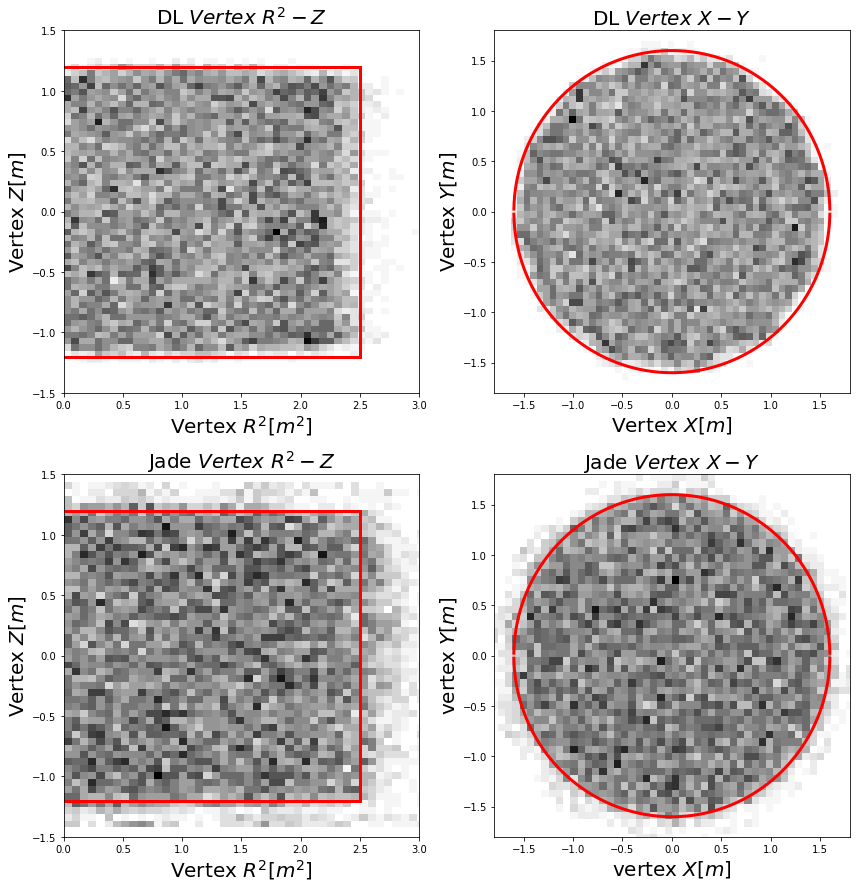

In [14]:
orig_map=plt.cm.get_cmap('gray')
  
# reversing the original colormap using reversed() function
r_map = orig_map.reversed()


plt.rcParams['figure.figsize'] = (12, 18)
plt.subplot(3,2,1)
plt.hist2d((pred[:,0]**2+pred[:,1]** 2),pred[:,2], bins = 50,cmap=r_map)
plt.axhline(y = 1.2, xmin=0, xmax=0.83333, color='r',linewidth=3)
plt.axhline(y = -1.2, xmin=0, xmax=0.83333, color='r',linewidth=3)
plt.axvline(x = 2.5,ymin=0.1,ymax=0.9,color='r',linewidth=3)

plt.title('DL '+r"$Vertex$"+" "+r"$R^2-Z$",fontsize = 20)
plt.xlim([0,3])
plt.ylim([-1.5,1.5])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Vertex "+r"$R^2[m^2]$", fontsize=20)
plt.ylabel("Vertex "+r"$Z[m]$", fontsize=20)

plt.subplot(3,2,3)
plt.hist2d((jade[:,0]**2+jade[:,1]** 2),jade[:,2], bins = 50,cmap=r_map)
plt.axhline(y = 1.2, xmin=0, xmax=0.83333, color='r',linewidth=3)
plt.axhline(y = -1.2, xmin=0, xmax=0.83333, color='r',linewidth=3)
plt.axvline(x = 2.5,ymin=0.1,ymax=0.9,color='r',linewidth=3)

plt.title('Jade '+r"$Vertex$"+" "+r"$R^2-Z$",fontsize = 20)
plt.xlim([0,3])
plt.ylim([-1.5,1.5])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Vertex "+r"$R^2[m^2]$", fontsize=20)
plt.ylabel("Vertex "+r"$Z[m]$", fontsize=20)



x = np.linspace(-100, 100, 500000)
y = np.sqrt(2.56 - x**2)

plt.subplot(3,2,2)
plt.hist2d(pred[:,0],pred[:,1], bins = 50,cmap=r_map)
plt.plot(x, y,color =  'red',linewidth=3.0)
plt.plot(x, -y,color =  'red',linewidth=3.0)
plt.title('DL '+r"$Vertex$"+" "+r"$X-Y$",fontsize = 20)
plt.xlim([-1.8,1.8])
plt.ylim([-1.8,1.8])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Vertex "+r"$X[m]$", fontsize=20)
plt.ylabel("Vertex "+r"$Y[m]$", fontsize=20)


plt.subplot(3,2,4)
plt.hist2d(jade[:,0],jade[:,1], bins = 50,cmap=r_map)
plt.plot(x, y,color =  'red',linewidth=3.0)
plt.plot(x, -y,color =  'red',linewidth=3.0)
plt.title('Jade '+r"$Vertex$"+" "+r"$X-Y$",fontsize = 20)
plt.xlim([-1.8,1.8])
plt.ylim([-1.8,1.8])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("vertex "+r"$X[m]$", fontsize=20)
plt.ylabel("vertex "+r"$Y[m]$", fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
p0 = [10,0.01,15]
ran = 400
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


plt.rcParams['figure.figsize'] = (5, 5)

data = (pred[:,2] - label[:,2])*1000

tmp_hist = plt.hist(data,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p0, absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$Z',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

print("A: %.5f +/- %.5f" % (popt[0], np.sqrt(pcov[0][0])))
print("mu: %.5f +/- %.5f" % (popt[1], np.sqrt(pcov[1][1])))
print("sigma: %.5f +/- %.5f" % (popt[2], np.sqrt(pcov[2][2])))


plt.xlabel("Reconstructed Z - True Z [mm]", fontsize=15, loc='right')
plt.ylabel("Events", fontsize=15,loc='top')
# plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
plt.show()



/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in true_divide


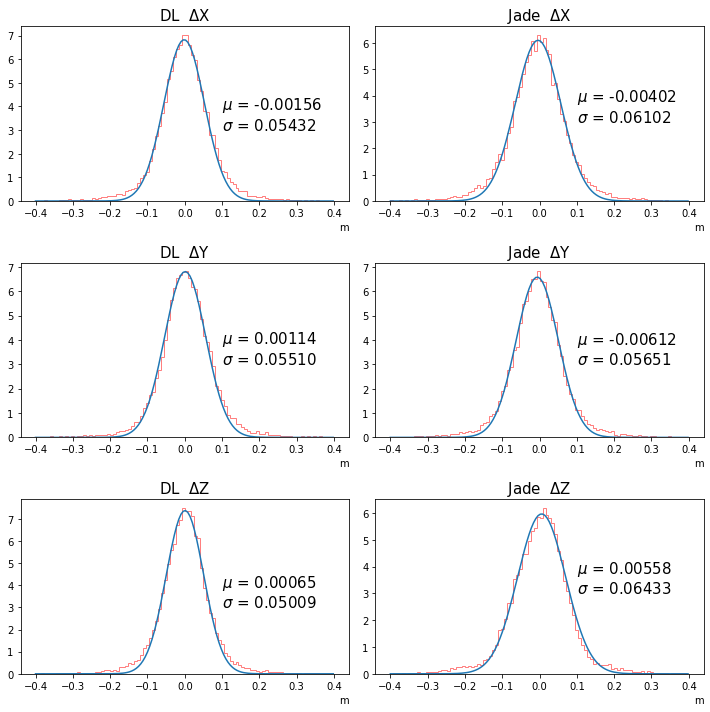

In [72]:

ran = 0.4
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f
plt.rcParams['figure.figsize'] = (10, 10)
plt.subplot(3,2,1)
tmp_hist = plt.hist(pred[:,0] - label[:,0],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
A = popt[0]; mu = popt[1]; sigma = popt[2]

plt.title('DL  ' + r'$\Delta$X',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,3)

tmp_hist = plt.hist(pred[:,1] - label[:,1],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$Y',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,5)
tmp_hist = plt.hist(pred[:,2] - label[:,2],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$Z',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')


plt.subplot(3,2,2)
tmp_hist = plt.hist(jade[:,0] - label[:,0],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('Jade  ' + r'$\Delta$X',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,4)

tmp_hist = plt.hist(jade[:,1] - label[:,1],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('Jade  ' + r'$\Delta$Y',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,6)
tmp_hist = plt.hist(jade[:,2] - label[:,2],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran, ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('Jade  ' + r'$\Delta$Z',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
plt.tight_layout()
plt.show()



In [22]:
re_mu_x = []
re_mu_y = []
re_mu_z = []

re_si_x = []
re_si_y = []
re_si_z = []
for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f

    for vtx in range(3):
        tmp_hist = plt.hist(pred[:,vtx][label[:,3] == a] - label[:,vtx][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], absolute_sigma=True,maxfev=8000)
        if vtx == 0:
            re_mu_x.append(popt[1])
            re_si_x.append(popt[2])
        if vtx == 1:
            re_mu_y.append(popt[1])
            re_si_y.append(popt[2])
        if vtx == 2:
            re_mu_z.append(popt[1])
            re_si_z.append(popt[2])
        plt.close()
        

In [23]:
ja_mu_x = []
ja_mu_y = []
ja_mu_z = []

ja_si_x = []
ja_si_y = []
ja_si_z = []
for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f

    for vtx in range(3):
        tmp_hist = plt.hist(jade[:,vtx][label[:,3] == a] - label[:,vtx][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
        if vtx == 0:
            ja_mu_x.append(popt[1])
            ja_si_x.append(popt[2])
        if vtx == 1:
            ja_mu_y.append(popt[1])
            ja_si_y.append(popt[2])
        if vtx == 2:
            ja_mu_z.append(popt[1])
            ja_si_z.append(popt[2])
        plt.close()

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

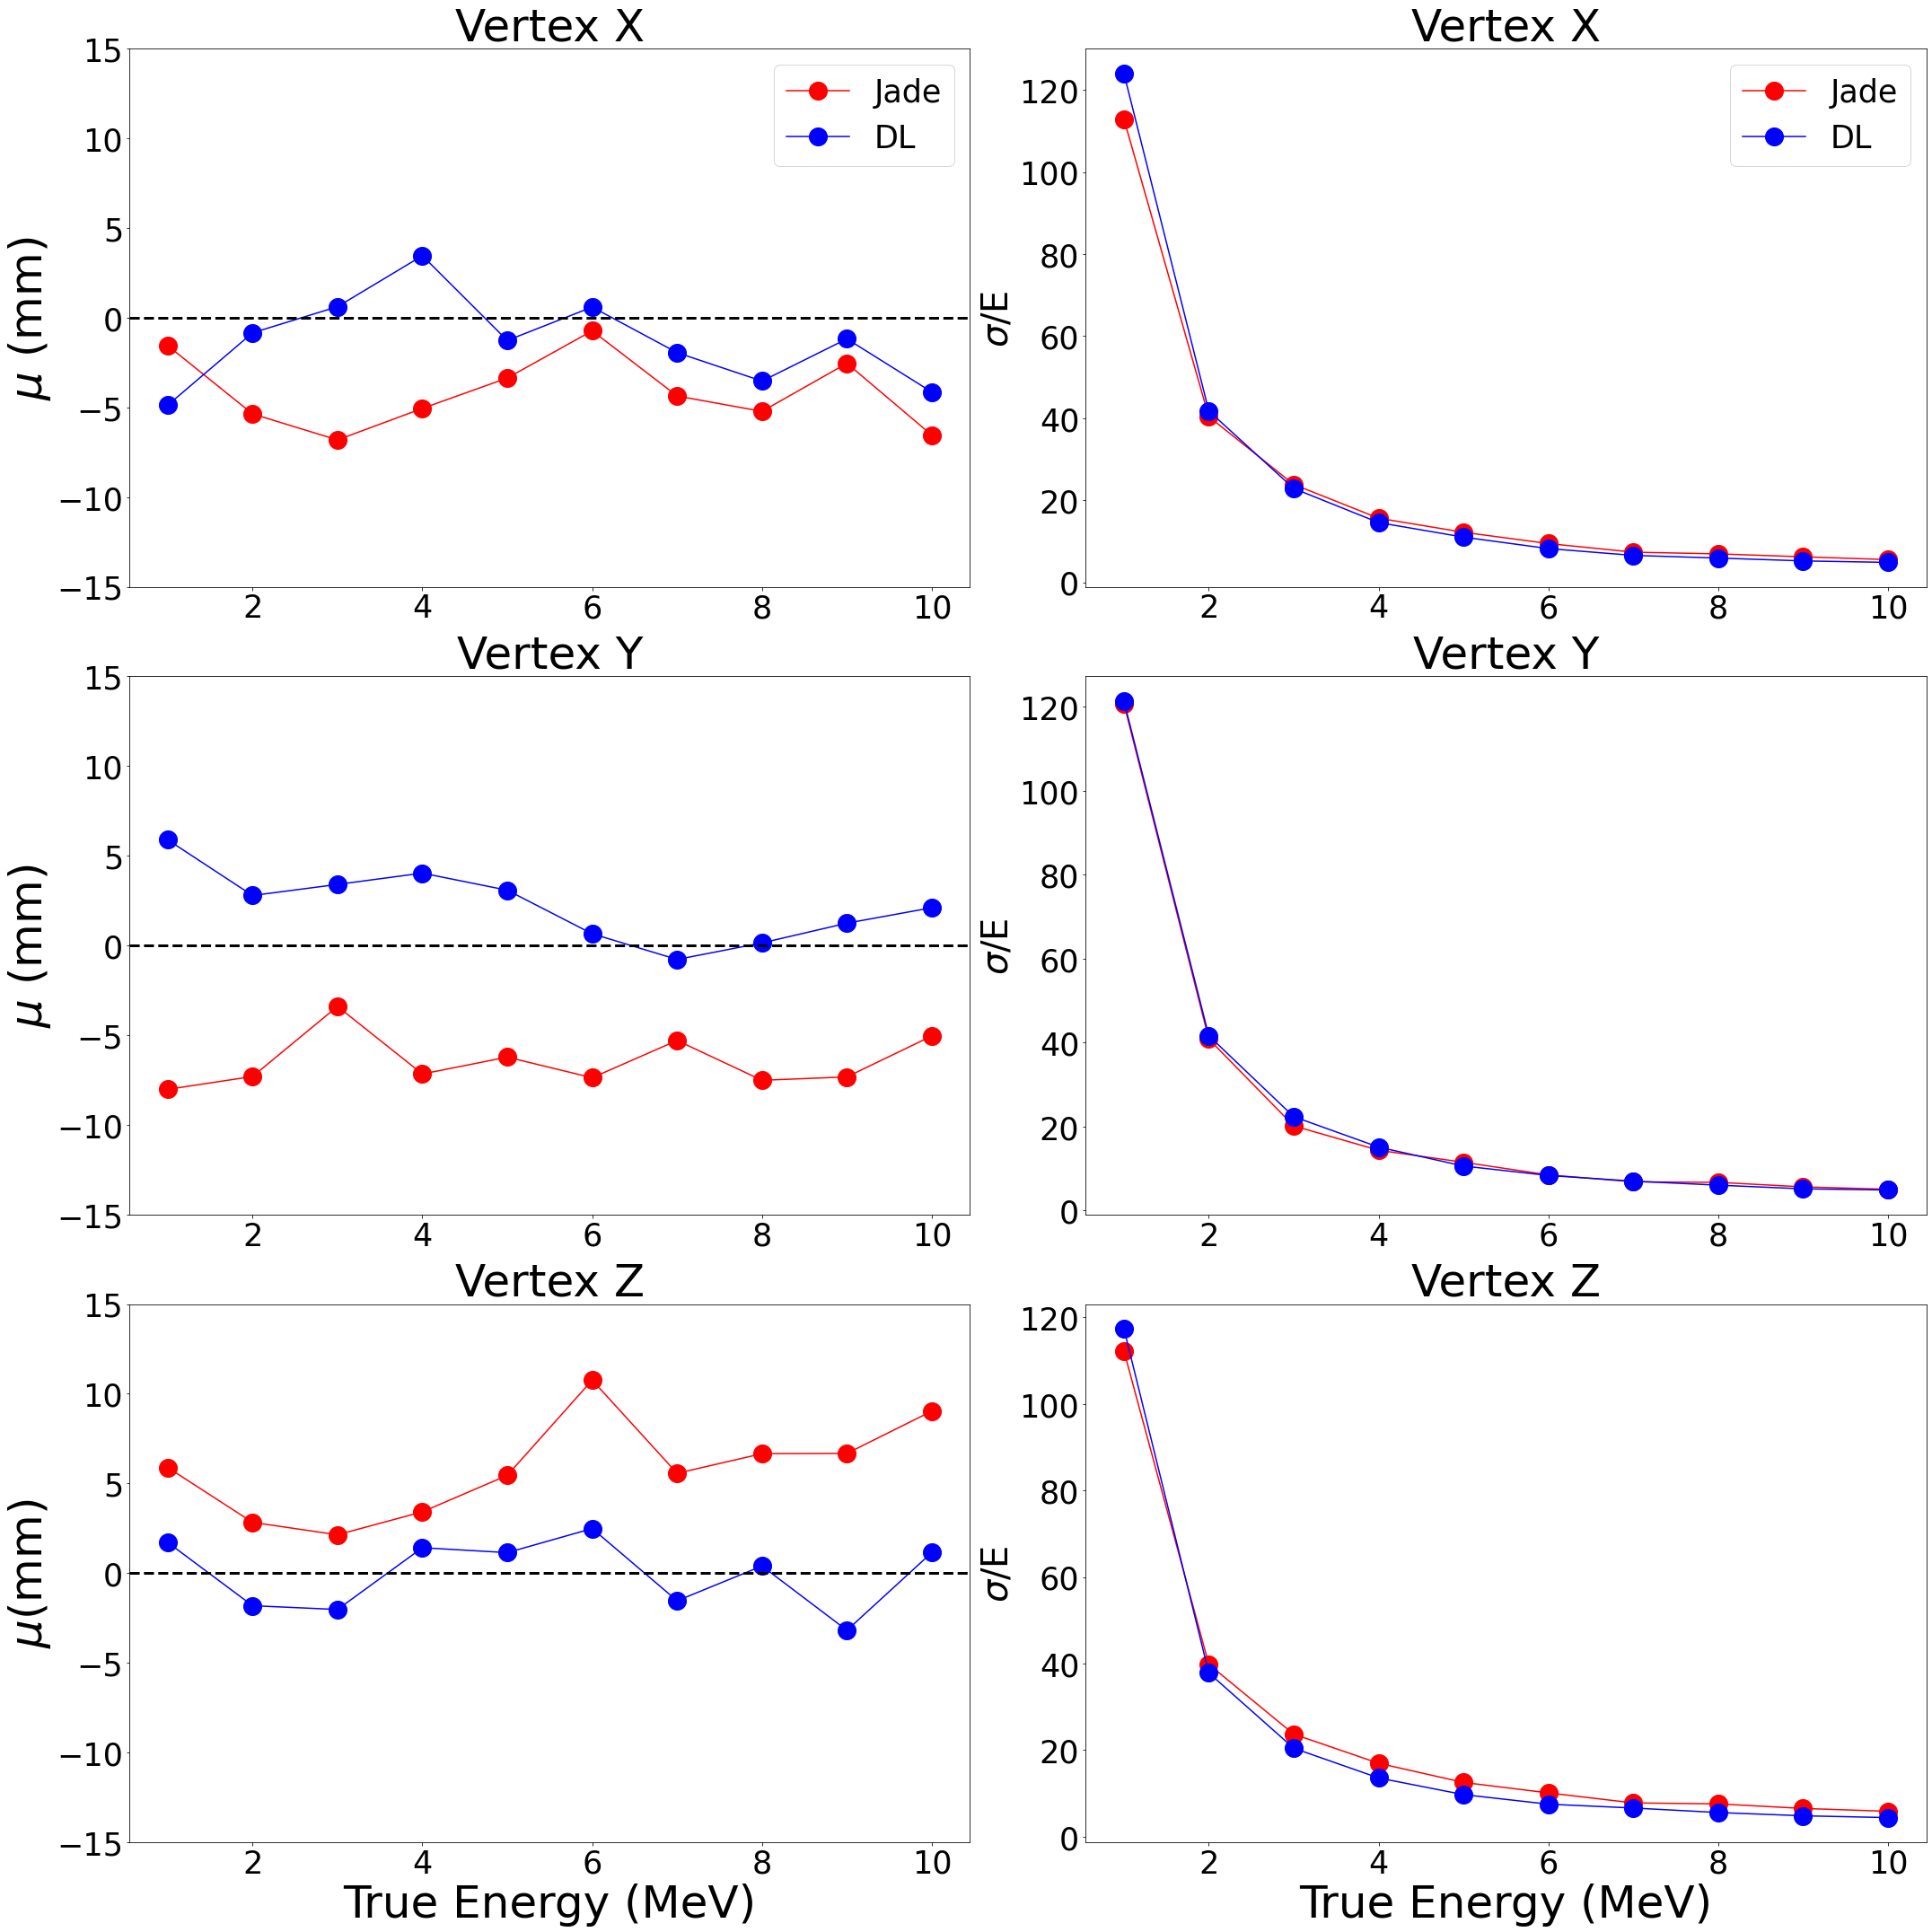

In [65]:
plt.rcParams['figure.figsize'] = (30, 30)


######################################

plt.subplot(3,2,1)
plt.plot(energy_list,np.array(ja_mu_x)*1000,'o-r',markersize = 20, label = 'Jade')
plt.plot(energy_list,np.array(re_mu_x)*1000,'o-b',markersize = 20, label = 'DL')
plt.axhline(y=0,color='black',linewidth=3, linestyle='--')
# plt.title('\nGaussian fitting \n$\mu$',fontsize = 50)
plt.title('Vertex X',fontsize = 50)
plt.ylabel('$\mu$ (mm)',fontsize = 50)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)
plt.ylim([-15,15])


plt.subplot(3,2,3)
plt.plot(energy_list,np.array(ja_mu_y)*1000,'o-r',markersize = 20, label = 'Jade')
plt.plot(energy_list,np.array(re_mu_y)*1000,'o-b',markersize = 20, label = 'DL')
plt.axhline(y=0,color='black',linewidth=3, linestyle='--')
plt.title('Vertex Y',fontsize = 50)
plt.ylabel('$\mu$ (mm)',fontsize = 50)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.ylim([-15,15])


plt.subplot(3,2,5)
plt.plot(energy_list,np.array(ja_mu_z)*1000,'o-r',markersize = 20, label = 'Jade')
plt.plot(energy_list,np.array(re_mu_z)*1000,'o-b',markersize = 20, label = 'DL')
plt.axhline(y=0,color='black',linewidth=3, linestyle='--')
plt.title('Vertex Z',fontsize = 50)
plt.xlabel('True Energy (MeV)',fontsize = 50)
plt.ylabel('$\mu$(mm)',fontsize = 50)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.ylim([-15,15])



plt.subplot(3,2,2)
plt.plot(energy_list,np.abs(ja_si_x)*1000/np.array(energy_list),'o-r',markersize=20,label = 'Jade')
plt.plot(energy_list,np.abs(re_si_x)*1000/np.array(energy_list),'o-b',markersize=20,label = 'DL')
plt.title('\nGaussian fitting \n$\sigma$/$\sqrt{N}$',fontsize = 50)
plt.ylabel('$\sigma$/E',fontsize = 40)
plt.title('Vertex X',fontsize = 50)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)


plt.subplot(3,2,4)
plt.plot(energy_list,np.abs(ja_si_y)*1000/np.array(energy_list),'o-r',markersize=20,label = 'Jade')
plt.plot(energy_list,np.abs(re_si_y)*1000/np.array(energy_list),'o-b',markersize=20,label = 'DL')
plt.ylabel('$\sigma$/E',fontsize = 40)
plt.title('Vertex Y',fontsize = 50)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)


plt.subplot(3,2,6)
plt.plot(energy_list,np.abs(ja_si_z)*1000/np.array(energy_list),'o-r',markersize=20,label = 'Jade')
plt.plot(energy_list,np.abs(re_si_z)*1000/np.array(energy_list),'o-b',markersize=20,label = 'DL')
plt.xlabel('True Energy (MeV)',fontsize = 50)
plt.ylabel('$\sigma$/E',fontsize = 40)
plt.title('Vertex Z',fontsize = 50)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)

plt.tight_layout()
plt.show()

